In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [86]:
df=pd.read_csv("veriler.csv")
eksikdf=pd.read_csv("eksikveriler.csv")
#print(eksikdf.isnull())#13[yaş] -16[yaş]
eksikdf=eksikdf.fillna(eksikdf["yas"].mean())
print(eksikdf.isna().mean())#hiç null kalmadı
veridf=df

ulke        0.0
boy         0.0
kilo        0.0
yas         0.0
cinsiyet    0.0
dtype: float64


In [67]:
df

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [68]:
from sklearn import preprocessing

In [69]:
le=preprocessing.LabelEncoder()
ohe=preprocessing.OneHotEncoder()

In [70]:
ülke=df.iloc[:,0:1].values
ülke[:,0]=le.fit_transform(df.iloc[:,0])
ülke[:,0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0],
      dtype=object)

In [71]:
ülke=ohe.fit_transform(ülke).toarray()
ülke

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [72]:
sonuc=pd.DataFrame(data=ülke,index=range(22),columns=["fr","tr","us"])
sonuc

,fr,tr,us
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


In [73]:
df=pd.read_csv("satislar.csv")
df

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5
5,19,28321.0
6,19,30075.0
7,20,27222.5
8,20,32222.5
9,24,28594.5


In [74]:
#y=ax+b
y=df[["Satislar"]]
x=df[["Aylar"]]


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [77]:
from sklearn.preprocessing import StandardScaler


In [78]:
sc=StandardScaler()

In [79]:
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)


Y_train = sc.fit_transform(y_train)
Y_test = sc.fit_transform(y_test)

In [80]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [81]:
print(type(df[["Aylar"]]))
print(type(df["Aylar"]))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [82]:
X_train
X_test
Y_test

array([[-0.45135386],
       [-0.6332297 ],
       [ 1.27221375],
       [ 0.85310051],
       [ 0.58084147],
       [ 0.11572304],
       [-1.18447844],
       [-1.4978611 ],
       [ 1.61381342],
       [-0.66876909]])

In [83]:
tahmin = lr.predict(x_test)

In [89]:
print(tahmin)
print(y_test)
type(y_test)

[[36958.33614635]
 [34531.01687812]
 [58804.20956049]
 [50713.14533303]
 [41003.86826008]
 [41003.86826008]
 [19157.99484594]
 [19967.10126869]
 [63658.84809696]
 [26439.95265066]]
    Satislar
16   33014.5
14   30555.5
27   56317.5
22   50651.0
19   46970.0
18   40681.5
1    23102.5
2    18865.5
29   60936.0
6    30075.0


pandas.core.frame.DataFrame

Text(0, 0.5, 'Satışlar')

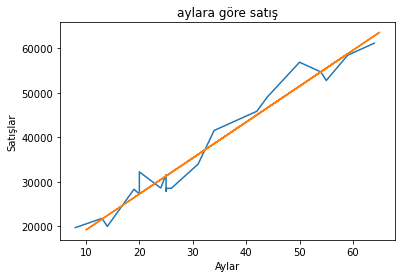

In [85]:
x_train = x_train.sort_index()
y_train = y_train.sort_index()

plt.plot(x_train,y_train)
plt.plot(x_test,lr.predict(x_test))

plt.title("aylara göre satış")
plt.xlabel("Aylar")
plt.ylabel("Satışlar")


In [87]:
veridf

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e
